# Introduction

## MNIST (Modified National Institute of Standard and Technology)

MNIST Data is large 28 x 28 pixel handwritten digits that commonly use to training various image processing system.<br> 

Data Source:(http://www.kaggle.com/c/digit-recognizer/data)

### Objective

Classify the written character into one of the numeric character using PCA and TSNE


In [2]:
#MNIST data set can be download from kaggle
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')
data.shape


(42000, 785)

In [3]:
labels = data['label']
Data  = data.drop('label' ,axis = 1)
print(Data.shape)
print(labels.shape)

(42000, 784)
(42000,)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


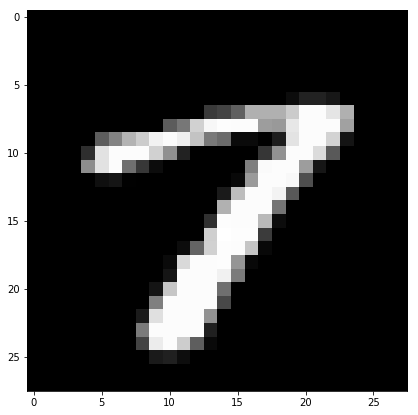

7


In [4]:
#plot the fig or image
plt.figure(figsize = (7,7))
idx = 3000
grid_data = Data.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,cmap = 'gray')
plt.show()
print(labels[idx])

# 2-D Visualization using PCA

In [28]:
label_1 = labels.head(1500)
data_1 = data.head(1500)
print('the data shape of sample data',data_1.shape)
label_1.shape

the data shape of sample data (1500, 785)


(1500,)

In [29]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data =  StandardScaler().fit_transform(data_1)
print(standardized_data.shape)

(1500, 785)


In [30]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T,sample_data)
print ( "The shape of variance matrix = ", covar_matrix.shape)



The shape of variance matrix =  (785, 785)


In [31]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.

value,vector = eigh(covar_matrix,eigvals = (783,784))
print(vector.shape)

(785, 2)


In [32]:
## converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vector.T
vectors.shape

(2, 785)

In [33]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
new_coordinates = np.matmul(vectors,sample_data.T)
print('the resultant new shape of the new coordinates', vectors.shape, "X", sample_data.T.shape ,'=', new_coordinates.shape)

the resultant new shape of the new coordinates (2, 785) X (785, 1500) = (2, 1500)


In [34]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, label_1)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label_1"))
print(dataframe.shape)
print(dataframe.head())


(1500, 3)
   1st_principal  2nd_principal  label_1
0       5.936412       4.955667      1.0
1      -3.183645     -19.028987      0.0
2       2.799792       7.563481      1.0
3      -0.244619       0.833738      4.0
4      -4.226325     -26.001098      0.0


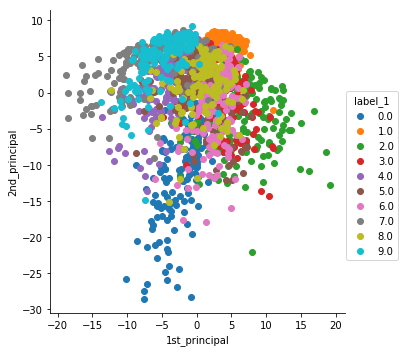

In [37]:
#ploting 2d scatter plot using seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label_1", size=5).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# obeservations

zeros are well group and well seprated
and remaining points are to much overlap to each other

# PCA for dimensionality redcution (not for visualization)

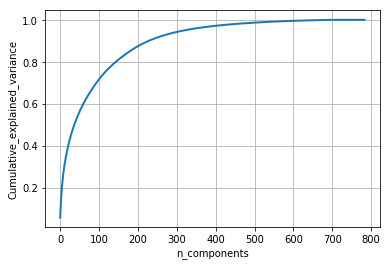

In [60]:
#pca for diminasion reduction.
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# t-SNE using Scikit-Learn


In [38]:
label_1 = labels.head(1500)
data_1 = data.head(1500)
print('the data shape of sample data',data_1.shape)


the data shape of sample data (1500, 785)


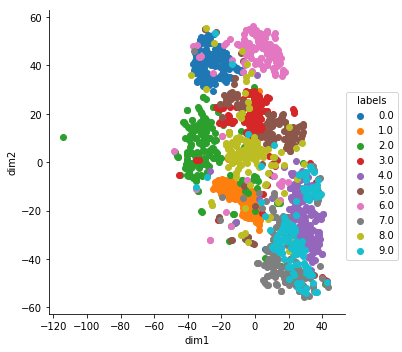

In [45]:
from sklearn.manifold import TSNE
modle = TSNE(n_components= 2,random_state = 0)

# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = modle.fit_transform(standardized_data)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,label_1)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ('dim1','dim2','labels'))
#ploting using seaborn
import seaborn as sns
sns.FacetGrid(tsne_df,hue = 'labels',size = 5).map(plt.scatter,'dim1','dim2').add_legend()


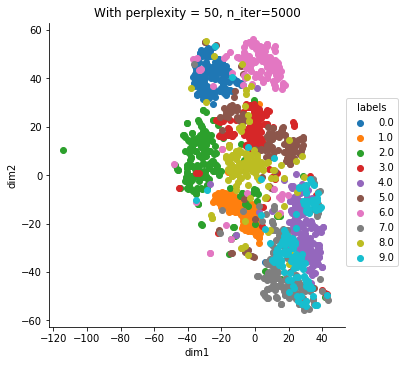

In [50]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = modle.fit_transform(standardized_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,label_1)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ('dim1','dim2','labels'))
#ploting using seaborn
import seaborn as sns
sns.FacetGrid(tsne_df,hue = 'labels',size = 5).map(plt.scatter,'dim1','dim2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()


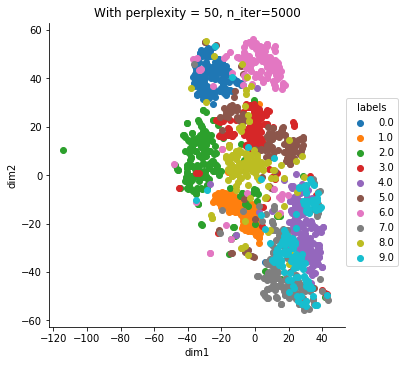

In [51]:
model = TSNE(n_components=2, random_state=0, perplexity=50,n_iter=5000 )
tsne_data = modle.fit_transform(standardized_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,label_1)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ('dim1','dim2','labels'))
#ploting using seaborn
import seaborn as sns
sns.FacetGrid(tsne_df,hue = 'labels',size = 5).map(plt.scatter,'dim1','dim2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

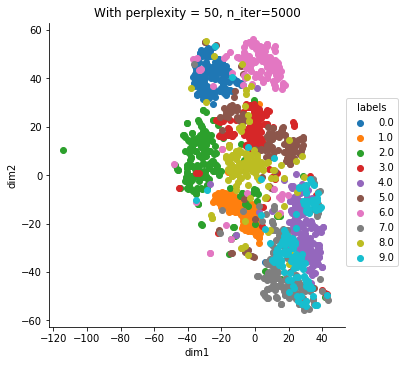

In [52]:
model = TSNE(n_components=2, random_state=0, perplexity=2,n_iter=5000 )
tsne_data = modle.fit_transform(standardized_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,label_1)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ('dim1','dim2','labels'))
#ploting using seaborn
import seaborn as sns
sns.FacetGrid(tsne_df,hue = 'labels',size = 5).map(plt.scatter,'dim1','dim2').add_legend()
plt.title('With perplexity = 2, n_iter=5000')
plt.show()

# Conclusion

1.Using PCA we can preserved linear structer but it is hard to differentiate clusters. <br>
2.using TSNE we can from neighborhood structure of data points and it is well cluster.<br>
  so on above two points we can conclude that both are good for data visualisation but as compare to PCA TSNE is better for data 
  visualisation.
   